Import necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read data

In [21]:
df = pd.read_csv("./Data/2008.csv", encoding='ISO-8859-1', low_memory=False)
df.index.name="Id"
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Id,,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Get hour

In [22]:
df['Hour'] = np.floor(df.CRSDepTime/100)

First use scatterplot to represent observations

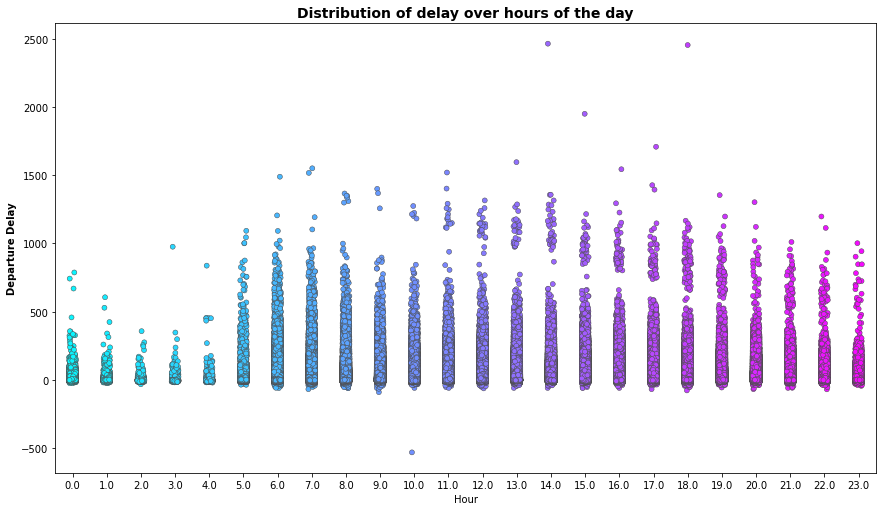

In [23]:
plt.figure(figsize=[14.70, 8.27])
sns.stripplot(data=df, x="Hour", y="DepDelay", dodge=True, linewidth=0.5, palette='cool')
plt.title("Distribution of delay over hours of the day", fontsize = 14, weight = "bold")
plt.ylabel('Departure Delay', fontsize = 10, weight = "bold")
plt.show()

Now let's group by hour and get mean

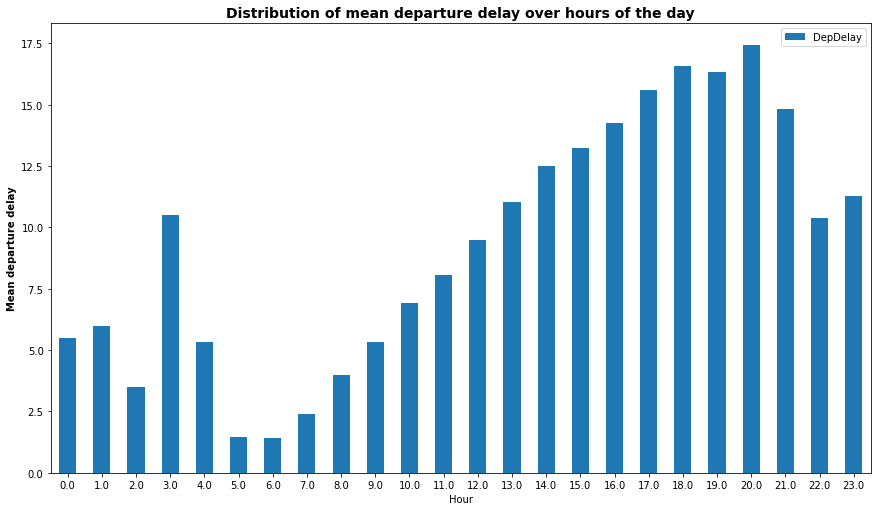

In [24]:
df = df.groupby(['Hour'])['DepDelay'].mean().reset_index()
ax = df.plot.bar(x='Hour', y='DepDelay', rot=0, figsize=[14.70, 8.27])
plt.title("Distribution of mean departure delay over hours of the day", fontsize = 14, weight = "bold")
plt.ylabel('Mean departure delay', fontsize = 10, weight = "bold")
plt.show()

Interpretation<br>
It can be seen that night flights tend to be the most on-time and have the smallest delays.<br>
However early morning hours are also acceptable. <br>
Flights scheduled between 12:00 am. and 10 am. usually have delays under 10 minutes.<br>
It can be also observed that the later the worse as then probability of long delay increases.